In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from fastai import *        # Quick accesss to most common functionality
from fastai.text import *   # Quick accesss to NLP functionality
import html

## Data

In [3]:
from fastai import datasets

In [4]:
datasets.URLs.WT103_1

'https://s3.amazonaws.com/fast-ai-modelzoo/wt103-1'

## Loading data

In [3]:
PATH=Path('data/wikitext-2')

In [4]:
bs = 64
bptt = 70

In [7]:
data = TextLMDataBunch.load(PATH, bs=bs, bptt=bptt)

In [8]:
learn = language_model_learner(data, clip=0.1)

In [9]:
# learn.opt_fn = partial(optim.Adam, betas=(0.8,0.99))
# learn.callback_fns.extend([partial(GradientClipping, clip=0.12)])

In [10]:
epoch = 12
lr = 1e-3
momentum = (0.8,0.7)
weight_decay = 1.2e-6

In [11]:
learn.fit_one_cycle(epoch, lr, moms=momentum, wd=weight_decay)

epoch,train_loss,valid_loss,accuracy
1,7.034281,6.670790,0.110255
2,6.361244,5.952893,0.184920
3,5.799350,5.468362,0.216972
4,5.418202,5.163412,0.235336
5,5.164464,4.996580,0.243762
6,4.993402,4.886591,0.252479
7,4.823814,4.810529,0.257709
8,4.718116,4.757985,0.260716
9,4.618078,4.735472,0.261720
10,4.552494,4.722591,0.262383


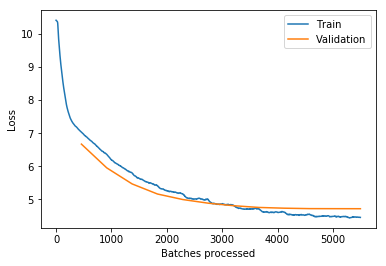

In [12]:
learn.recorder.plot_losses()

In [11]:
learn.save('lstm_wt2')

### Testing (for fun)

In [12]:
learn.load('lstm_wt2'); learn.model.eval();

In [16]:
x_str = "The online encyclopedia project Wikipedia is the most popular wiki-based website, and is"

In [17]:
pred_out = learn.predict(x_str, n_words=500)

In [18]:
pred_out

'The online encyclopedia project Wikipedia is the most popular wiki-based website, and is placed in 1965 on xxup cbs , xxmaj israel , xxmaj michigan , and xxmaj guatemala . xxbos = = = xxmaj losses = = = xxbos xxmaj the xxmaj assembly xxmaj rooms of the xxmaj state of xxmaj maryland established in the israel being located outside the parish \'s adjoining mud industry from the summer of 1656 to 1890s . xxmaj their survey novels xxmaj john xxmaj berlin and the local historian xxmaj peter xxmaj baker intracellular offerings in the city \'s parliament , including the city of xxmaj westminster . xxmaj the xxmaj archaeology of xxmaj fine xxmaj arts and the xxmaj removes xxmaj tooth of the xxmaj old xxmaj king , the xxmaj ancient xxmaj society des xxmaj san xxmaj francisco , who was known as the xxmaj city of xxmaj london , volunteered for legal popularity . xxmaj one collection of constitution speaks of xxmaj oldham , with aim of archaeology , describes its grasp and power to improve the att